In [1]:
import sys

if "/Users/shvimas/GitHub/diploma/src" not in sys.path:
    sys.path.append("/Users/shvimas/GitHub/diploma/src")

In [2]:
%matplotlib inline
from importlib import reload
import matplotlib.pyplot as pl
import data_helpers as dh
import helper_funcs as hf
import vg_pricing as vg
from pars_range import Range, ParsRange
from fft import FFT

pl.rcParams["figure.figsize"] = (15, 10)
pl.style.use('ggplot')

In [3]:
pl.rcParams["figure.figsize"] = (15, 10)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
try:
    data, info = hf.read_data("../SPH2_031612.csv")
except FileNotFoundError:
    data, info = hf.read_data("SPH2_031612.csv")

In [6]:
try:
    data = hf.get_prepared_data()
except:
    data, info = dh.prepare_data(data=data, info=info)

In [13]:
day = 46
rate = .008
q = rate
maturity = info[day].mat
spot = info[day].spot
is_call = True
strikes = data.strikes[is_call][day]
prices = data.prices[is_call][day]

args = (spot, strikes, maturity, rate, q, is_call)
print(args)

(1160.7, array([  910.,   920.,   925.,   930.,   940.,   950.,   960.,   970.,
         975.,   980.,   990.,  1000.,  1010.,  1020.,  1025.,  1030.,
        1040.,  1050.,  1060.,  1070.,  1075.,  1080.,  1090.,  1100.,
        1110.,  1120.,  1125.,  1130.,  1140.,  1150.,  1160.,  1170.,
        1175.,  1180.,  1190.,  1200.,  1210.,  1220.,  1225.,  1230.,
        1240.,  1250.,  1260.,  1270.,  1275.,  1280.,  1290.,  1300.,
        1310.,  1320.,  1325.,  1330.,  1340.,  1350.,  1360.,  1370.,
        1375.,  1380.]), 0.5616438356164384, 0.008, 0.008, True)


In [14]:
import warnings
warnings.filterwarnings("ignore", message='numpy.dtype size changed')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore', message="can't resolve package from __spec__ or __package__, ")

In [15]:
from structs import EvalArgs
import scipy.optimize as opt
from gen_pricer import GenPricer
from config import par_bounds

gp = GenPricer(model='vg', market=EvalArgs.from_structure(data, info, rate, day), use_fft=True)
actual_calls = data.prices[True][day]
actual_puts = data.prices[False][day]

In [16]:
res1 = gp.optimize_pars(metric='RMSE', bounds=par_bounds['vg'], 
                       actual_calls=actual_calls, actual_puts=actual_puts,
                       optimizer=opt.differential_evolution,
                       disp=True, maxiter=50, polish=True)

res1.x

differential_evolution step 1: f(x)= 24.9513
differential_evolution step 2: f(x)= 18.9179
differential_evolution step 3: f(x)= 16.3977
differential_evolution step 4: f(x)= 11.3283
differential_evolution step 5: f(x)= 6.97532
differential_evolution step 6: f(x)= 2.81709
differential_evolution step 7: f(x)= 2.04953
differential_evolution step 8: f(x)= 2.04953
differential_evolution step 9: f(x)= 2.04953
differential_evolution step 10: f(x)= 2.04953
differential_evolution step 11: f(x)= 1.97137
differential_evolution step 12: f(x)= 1.97137
differential_evolution step 13: f(x)= 1.19534
differential_evolution step 14: f(x)= 1.0026
differential_evolution step 15: f(x)= 0.904418
differential_evolution step 16: f(x)= 0.891275
differential_evolution step 17: f(x)= 0.798363
differential_evolution step 18: f(x)= 0.72526
differential_evolution step 19: f(x)= 0.72526
differential_evolution step 20: f(x)= 0.72526
differential_evolution step 21: f(x)= 0.72526
differential_evolution step 22: f(x)= 0.7

array([ 0.80304446, -0.28109178,  0.24621751])

In [25]:
res2 = gp.optimize_pars(metric='MAR', bounds=par_bounds['vg'], 
                       actual_calls=actual_calls, actual_puts=actual_puts,
                       optimizer=opt.differential_evolution,
                       disp=True, maxiter=50, polish=True)

res2.x

differential_evolution step 1: f(x)= 1.27101
differential_evolution step 2: f(x)= 1.27101
differential_evolution step 3: f(x)= 1.2546
differential_evolution step 4: f(x)= 1.2546
differential_evolution step 5: f(x)= 1.2546
differential_evolution step 6: f(x)= 1.17123
differential_evolution step 7: f(x)= 1.12833
differential_evolution step 8: f(x)= 1.01372
differential_evolution step 9: f(x)= 1.01372
differential_evolution step 10: f(x)= 1.01372
differential_evolution step 11: f(x)= 1.01372
differential_evolution step 12: f(x)= 1.00968
differential_evolution step 13: f(x)= 1.009
differential_evolution step 14: f(x)= 1.009
differential_evolution step 15: f(x)= 1.00724
differential_evolution step 16: f(x)= 1.00724
differential_evolution step 17: f(x)= 1.00724
differential_evolution step 18: f(x)= 1.00724
differential_evolution step 19: f(x)= 1.00724
differential_evolution step 20: f(x)= 1.00661
differential_evolution step 21: f(x)= 1.00661
differential_evolution step 22: f(x)= 1.00605


array([ 0.74883193, -0.17962482,  0.16643459])

In [63]:
res3 = gp.optimize_pars(metric='RMR', bounds=par_bounds['vg'], 
                       actual_calls=actual_calls, actual_puts=actual_puts,
                       optimizer=opt.differential_evolution,
                       disp=True, maxiter=50, polish=True)

res3.x

differential_evolution step 1: f(x)= 1.35203
differential_evolution step 2: f(x)= 1.13929
differential_evolution step 3: f(x)= 1.12973
differential_evolution step 4: f(x)= 1.12973
differential_evolution step 5: f(x)= 1.12973
differential_evolution step 6: f(x)= 1.02867
differential_evolution step 7: f(x)= 1.02867
differential_evolution step 8: f(x)= 1.02867
differential_evolution step 9: f(x)= 1.02867
differential_evolution step 10: f(x)= 1.02799
differential_evolution step 11: f(x)= 1.02623
differential_evolution step 12: f(x)= 1.01969
differential_evolution step 13: f(x)= 1.01969
differential_evolution step 14: f(x)= 1.01969
differential_evolution step 15: f(x)= 1.01969
differential_evolution step 16: f(x)= 1.01306
differential_evolution step 17: f(x)= 1.01124
differential_evolution step 18: f(x)= 1.01124
differential_evolution step 19: f(x)= 1.01124
differential_evolution step 20: f(x)= 1.01124
differential_evolution step 21: f(x)= 1.01124
differential_evolution step 22: f(x)= 1.004

array([ 0.99622151, -0.15801911,  0.19783906])

In [64]:
print(vg.price_vg(pars=res1.x, args=args))
print(vg.price_vg(pars=res2.x, args=args))
print(vg.price_vg(pars=res3.x, args=args))


[ 275.87079569  267.28503781  263.02626863  258.79672578  250.42826301
  242.15862544  233.94553369  225.76387604  221.68777884  217.62769142
  209.57941138  201.65749095  193.86927003  186.18935573  182.37859051
  178.58272937  171.0335892   163.558539    156.19590727  148.98053968
  145.43245706  141.92262457  135.00468604  128.19741086  121.48245697
  114.86688401  111.6052146   108.38056283  102.05943412   95.92606546
   89.9796519    84.20087181   81.36706383   78.56768547   73.07202701
   67.72761879   62.56500129   57.61743242   55.23167457   52.9061779
   48.43347215   44.18668794   40.15095542   36.32306316   34.49132591
   32.71907098   29.3715343    26.31753848   23.58313743   21.17126514
   20.07981884   19.0583051    17.20042395   15.54653624   14.05225108]
[ 275.7223503   267.16260446  262.90340935  258.66545792  250.27004294
  241.98800542  233.7973447   225.66464586  221.61416536  217.57523638
  209.54643044  201.61478115  193.80931197  186.13226155  182.33535384
  178.

In [95]:
day = 24
rate = .008
q = rate
maturity = info[day].mat
spot = info[day].spot
is_call = True
strikes = data.strikes[is_call][day]
prices = data.prices[is_call][day]

args = (spot, strikes, maturity, rate, q, is_call)

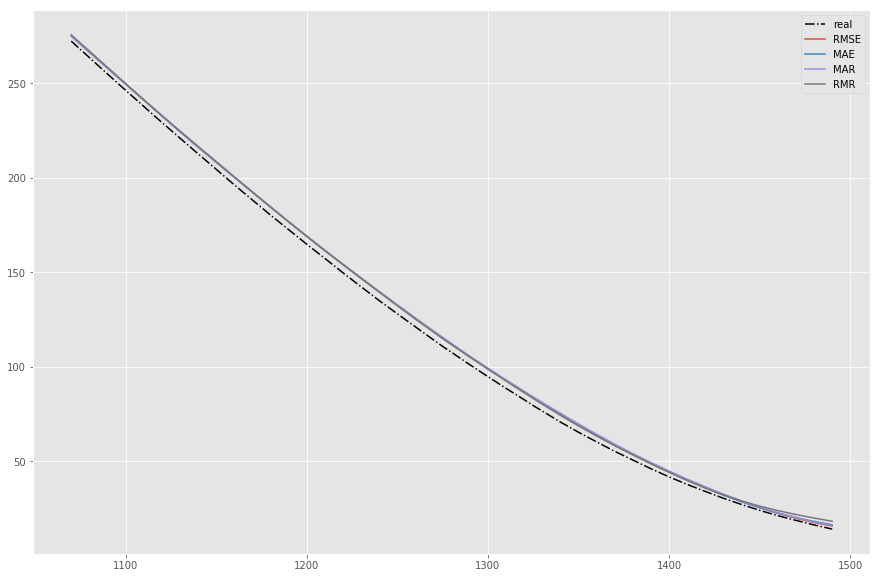

In [96]:
pl.plot(strikes, prices, "k-.", label='real')
pl.plot(strikes, vg.price_vg(pars=(0.838288229519, -0.188041448229, 0.179096609286), args=args), label='RMSE')
pl.plot(strikes, vg.price_vg(pars=res1.x, args=args), label='MAE')
pl.plot(strikes, vg.price_vg(pars=res2.x, args=args), label='MAR')
pl.plot(strikes, vg.price_vg(pars=res3.x, args=args), label='RMR')
pl.legend()

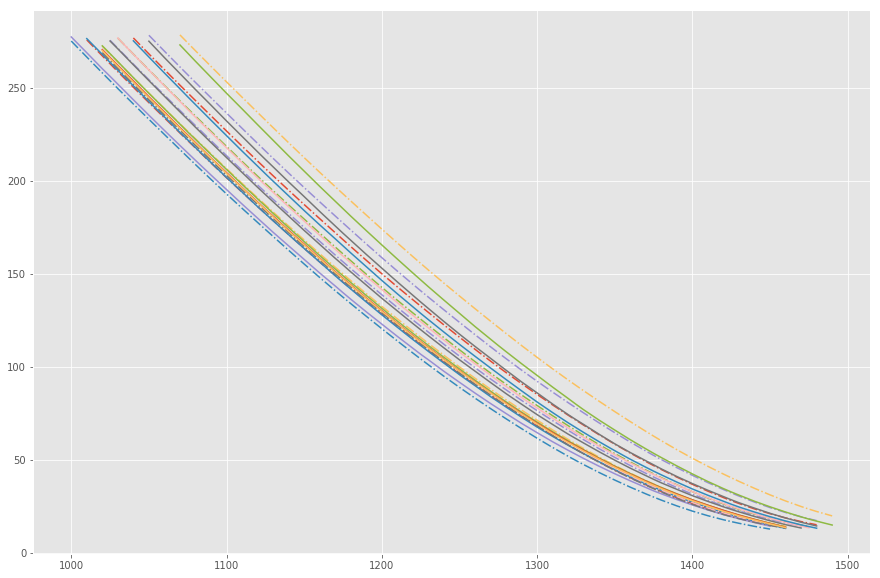

In [34]:
for d in range(10):
    rate = .008
    q = rate
    maturity = info[d].mat
    spot = info[d].spot
    is_call = True
    strikes = data.strikes[is_call][d]
    prices = data.prices[is_call][d]

    args = (spot, strikes, maturity, rate, q, is_call)
    
    pl.plot(strikes, vg.price_vg(pars=(0.838288229519, -0.188041448229, 0.179096609286), args=args), '-.', label=f'RMSE day {d}')
    pl.plot(strikes, prices, label=f'real day {d}')

In [ ]:
%load_ext autoreload
%autoreload

In [ ]:
mo.par_bounds

In [ ]:
is_call = False
for d in range(0, 32):
    pl.plot(data.strikes[is_call][d], data.prices[is_call][d])

In [ ]:
spots = [info[day].spot for day in range(187)]
pl.plot(spots)

In [10]:
import warnings
warnings.filterwarnings("ignore", message='numpy.dtype size changed')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore', message="can't resolve package from __spec__ or __package__, ")

In [12]:
import numpy as np
import sklearn.decomposition as de
import os
if os.getcwd() != '/Users/shvimas/GitHub/diploma':
    os.chdir('/Users/shvimas/GitHub/diploma')
    
metric = "MAE"

centers1 = np.array(hf.get_tuned_params(model1='ls', model2='vg', drop_bad=True, metric=metric))
pca1 = de.PCA(n_components=2)
pca1.fit(centers1)
print(pca1.explained_variance_ratio_)
components1 = pca1.components_
print(components1)

centers2 = np.array(hf.get_tuned_params(model1='heston', model2='vg', drop_bad=True, metric=metric))
pca2 = de.PCA(n_components=2)
pca2.fit(centers2)
print(pca2.explained_variance_ratio_)
components2 = pca2.components_
print(components2)

[ 0.87684893  0.10194025]
[[-0.98187072  0.11321102 -0.15203011]
 [-0.1817187  -0.7903792   0.58504618]]
[ 0.85390335  0.13936829]
[[ 0.9239065  -0.25667694  0.28374941]
 [-0.38118721 -0.68155963  0.62463812]]


"\ndh.plot_and_color_2d_params(model='vg', dots=centers1_2d, \n                            factors=pca.components_, means=pca.mean_,\n                            bounds_only=True)\n"

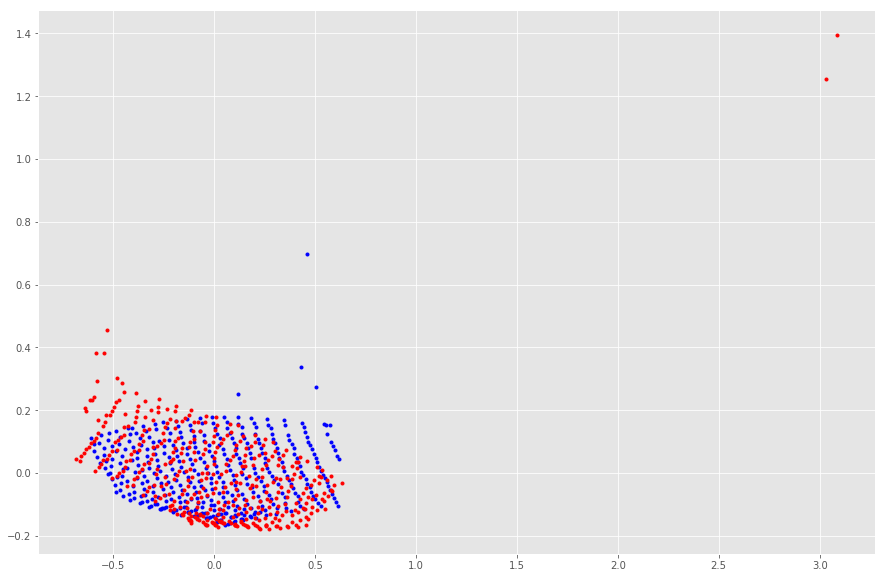

In [84]:
centers1_2d = pca1.fit_transform(centers1)
centers2_2d = pca2.fit_transform(centers2)
dh.plot_dots(centers1_2d, centers2_2d, style1='b.', style2='r.')
'''
dh.plot_and_color_2d_params(model='vg', dots=centers1_2d, 
                            factors=pca.components_, means=pca.mean_,
                            bounds_only=True)
'''

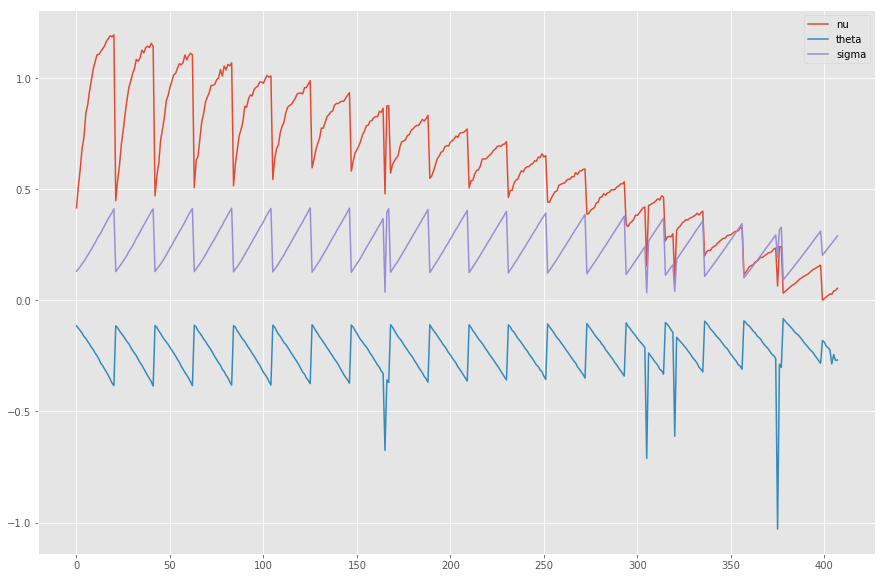

In [85]:
pl.plot(centers1[:, 0], label='nu')
pl.plot(centers1[:, 1], label='theta')
pl.plot(centers1[:, 2], label='sigma')
p = pl.legend()

In [28]:
with open('params/pca_vg.txt', 'w') as f:
    f.writelines([f"{-0.5}, {0.5}, {-0.2}, {0.25}\n",
                  f"{dh.array2str(components)}\n",
                  f"{dh.array2str(pca.mean_)}\n"])

In [29]:
components

array([[-0.98443404, -0.16438147, -0.06219608],
       [ 0.12192059, -0.89359836,  0.4319923 ]])

In [32]:
centers - (centers_2d @ components + pca.mean_)
pass

In [33]:
components @ components.transpose() @ components - components

array([[  2.22044605e-16,   8.32667268e-17,  -6.93889390e-18],
       [  2.77555756e-17,   2.22044605e-16,  -1.11022302e-16]])

In [89]:
grid = hf.grid(-0.5, 0.5, -0.17, 0.25)

In [92]:
restored = np.array(list(map(
    lambda dot: dot @ components1 + pca1.mean_,
    grid
)))

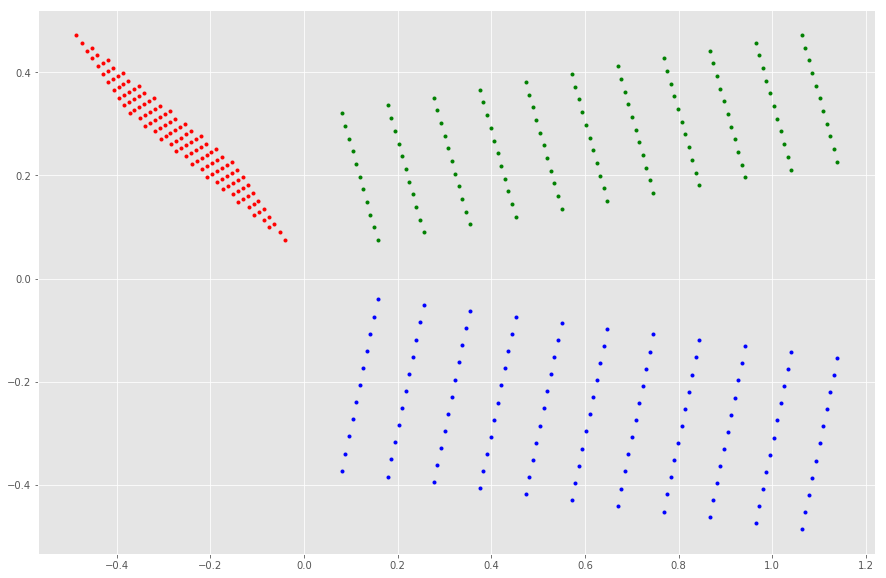

In [94]:
pl.plot(restored[:, 0], restored[:, 1], 'b.')
pl.plot(restored[:, 1], restored[:, 2], 'r.')
pl.plot(restored[:, 0], restored[:, 2], 'g.')

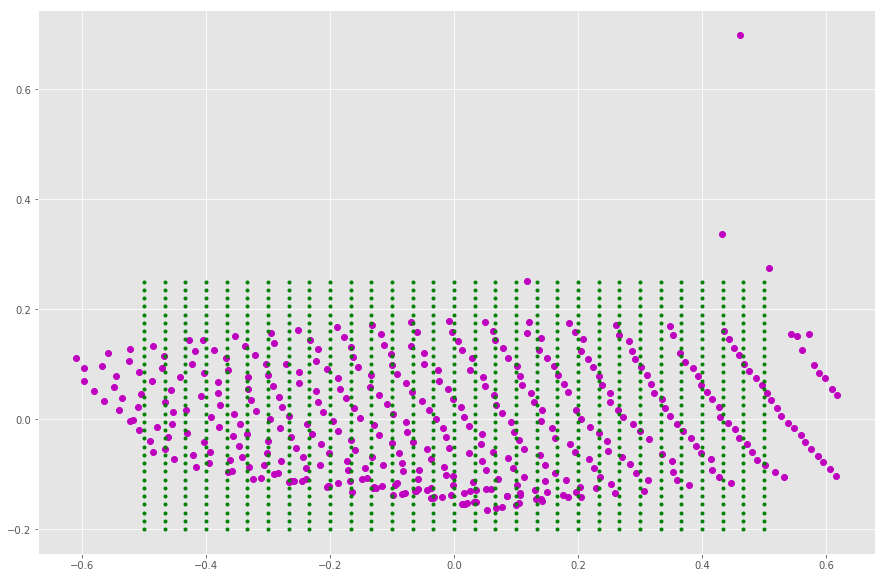

In [87]:
common_grid = np.array(hf.grid(-0.5, 0.5, -0.2, 0.25, n=30))

dh.plot_dots(centers1_2d, style1='mo')
dh.plot_and_color_2d_params(model='vg', dots=common_grid, 
                            factors=pca1.components_, means=pca1.mean_, 
                            style_good='g.', style_bad='r.', bounds_only=False)
